In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [3]:
# latin 1 encoding to represent characters in computer understandable lang
# csv file had cols text and spam so we turned into emaiks and labels

dff = pd.read_csv("(add your path)/emails.csv", encoding = "latin-1", usecols=["text", "spam"])
dff.columns = ["email", "label"]
dff

,email,label
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
# saving the shuffled dataset to a new csv file

df = dff.sample(frac=1).reset_index(drop=True)
df.to_csv('shuffled_dataset.csv', index=False)
df

,email,label
0,"Subject: re : alp presentation dennis , than...",0
1,Subject: meeting at wharton i am out of the o...,0
2,"Subject: re : options model jeff , i got 20 ...",0
3,Subject: re : dinner this fri . in london ? e...,0
4,Subject: enhance your anatomy i ' ve been usi...,1
...,...,...
5723,Subject: option visualization vince and stins...,0
5724,Subject: re : houston trip dear vince / chris...,0
5725,"Subject: do not have money , get software cds ...",1
5726,Subject: data for moody ' s riskcalc craig an...,0


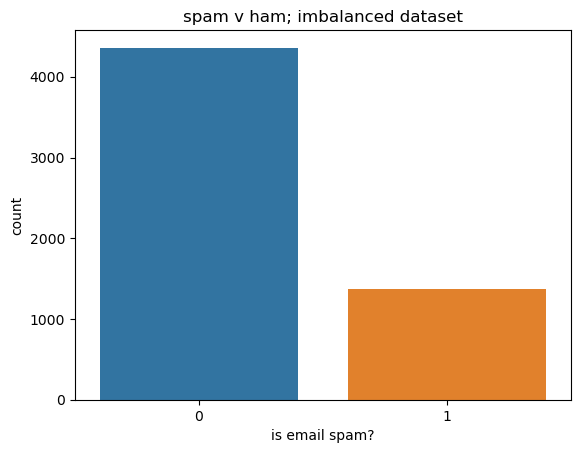

In [5]:
# visualization thru plotting (imbalanced dataset)

g = sns.countplot(x='label', data=df)
p = plt.title('spam v ham; imbalanced dataset')
p = plt.xlabel('is email spam?') #0-ham, 1-spam
p = plt.ylabel('count')

In [6]:
# separating and printing instances of ham and spam

only_spam = df[df['label']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 1368
Number of Ham records: 4360


In [7]:
# calculating the no. of times we have to replicate the spam recocrds
# (5728-1368)/1368 = 3.187 ~ 3

count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
count

3

In [8]:
# replicating the spam records and concatinating to og dataframe

for i in range(0, count-1):
  df = pd.concat([df, only_spam])

# new shape of the dataset after balancing

df.shape

(8464, 2)

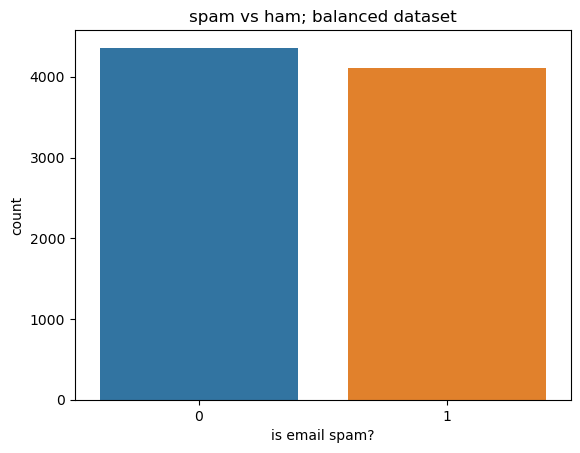

In [9]:
# visualization thru plotting (balanced dataset)

g = sns.countplot(x='label', data=df)
p = plt.title('spam vs ham; balanced dataset')
p = plt.xlabel('is email spam?') #0-ham, 1-spam
p = plt.ylabel('count')

In [10]:
# separating and printing instances of ham and spam

only_spam = df[df['label']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 4104
Number of Ham records: 4360


In [11]:
# cleaning the emails
corpus = []
wnl = WordNetLemmatizer()

for email_string in list(df.email):

  # cleaning special character from the email
  email = re.sub(pattern='[^a-zA-Z]', repl=' ', string=email_string)

  # converting the entire email into lower case
  email = email.lower()

  # tokenizing the email by words
  words = email.split()

  # removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  email = ' '.join(lemmatized_words)

  corpus.append(email)


In [12]:
for i in range(2):
    print(corpus[i])

subject alp presentation dennis thanks message shall send information regarding dinner later week christie patrick charge university liaison unit making arrangement evening enron field hopefully shall able combine dinner game vince dennis w loughridge please respond cc subject alp presentation vince attending alp presentation may would pleased join team dinner late thank dennis loughridge dennis w loughridge director energy consortium rice university original message vince j kaminski enron com mailto vince j kaminski enron com sent tuesday april loughrid rice edu cc luigical rice edu subject alp presentation sorry trying probably got wrong e mail address original message returned vince kaminski forwarded vince j kaminski hou ect vince j kaminski barrett rice edu uecker rice edu cmiller rice edu lounghrid rice edu luigical rice edu cc vince j kaminski hou ect ect christie patrick hou ect ect shirley crenshaw hou ect ect kenneth parkhill na enron enron subject alp presentation behalf enr

In [13]:
# feature extraction

tfidf = TfidfVectorizer(max_features=1000)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

# extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']
X

,ability,able,access,account,acquisition,act,action,activity,actual,ad,...,write,wrote,www,yahoo,year,yes,yesterday,yet,york,zimin
0,0.0,0.042317,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.230821
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8459,0.0,0.076557,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000
8460,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000
8461,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000
8462,0.0,0.000000,0.0,0.013718,0.0,0.0,0.0,0.0,0.0,0.054464,...,0.01591,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.017913,0.000000


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


accuracy of AdaBoost: 97.75546367395157


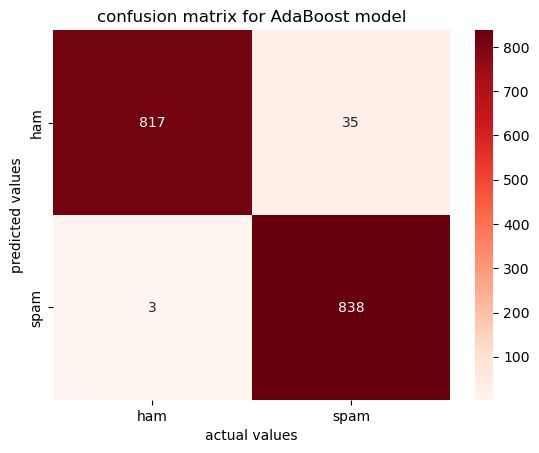

In [15]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("\naccuracy of AdaBoost:", accuracy_score(y_test, y_pred_ada)*100)
cm_ada = confusion_matrix(y_test, y_pred_ada)

axis_labels = ['ham', 'spam'] 
g = sns.heatmap(data=cm_ada, annot=True, cmap="Reds", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
p = plt.xlabel('actual values')
p = plt.ylabel('predicted values')
p = plt.title('confusion matrix for AdaBoost model')


accuracy of Bagging: 98.34613112817485


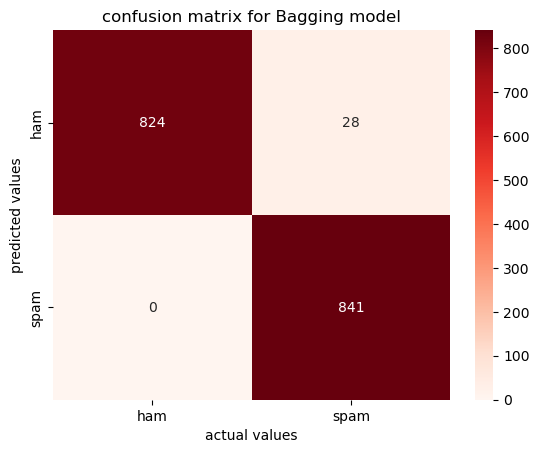

In [16]:
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

print("\naccuracy of Bagging:", accuracy_score(y_test, y_pred_bagging)*100)
cm_bagging = confusion_matrix(y_test, y_pred_bagging)

axis_labels = ['ham', 'spam'] 
g = sns.heatmap(data=cm_bagging, annot=True, cmap="Reds", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
p = plt.xlabel('actual values')
p = plt.ylabel('predicted values')
p = plt.title('confusion matrix for Bagging model')


accuracy of decision tree: 98.40519787359716


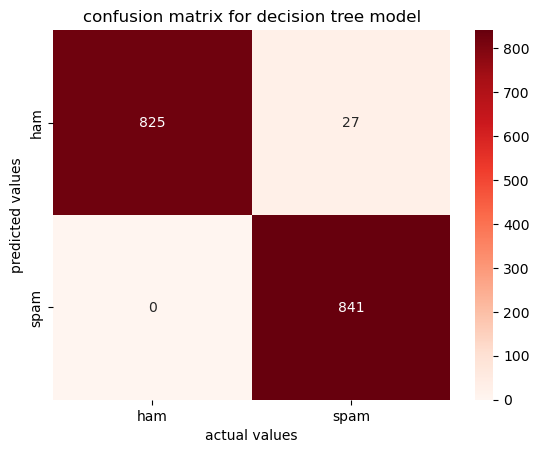

In [17]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\naccuracy of decision tree:", accuracy_score(y_test, y_pred_dt)*100)
cm = confusion_matrix(y_test, y_pred_dt)

axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Reds", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g' )
p = plt.xlabel('actual values')
p = plt.ylabel('predicted values')
p = plt.title('confusion matrix for decision tree model')


accuracy of k-nearest neighbour: 97.69639692852924


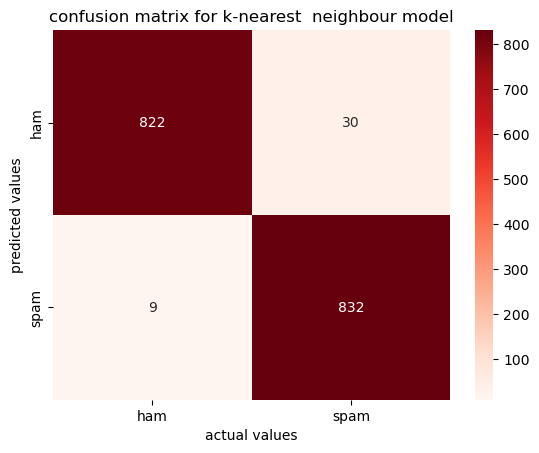

In [18]:
knn = KNeighborsClassifier(n_neighbors=7)  #can adjust the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\naccuracy of k-nearest neighbour:", accuracy_score(y_test, y_pred_knn)*100)
cm = confusion_matrix(y_test, y_pred_knn)

axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Reds", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g' )
p = plt.xlabel('actual values')
p = plt.ylabel('predicted values')
p = plt.title('confusion matrix for k-nearest  neighbour model')


accuracy for linear regression (with thresholding): 98.93679858239811


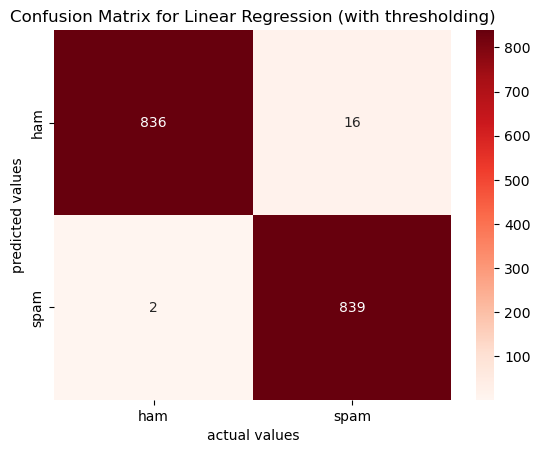

In [19]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_linreg_class = linreg.predict(X_test)

#thresholding
y_pred_linreg = (y_pred_linreg_class > 0.5).astype(int)  # converting to 0 (ham) or 1 (spam) based on threshold
accuracy = accuracy_score(y_test, y_pred_linreg)

print("\naccuracy for linear regression (with thresholding):", accuracy * 100)
cm = confusion_matrix(y_test, y_pred_linreg)

axis_labels = ['ham', 'spam'] 
g = sns.heatmap(data=cm, annot=True, cmap="Reds", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
p = plt.xlabel('actual values')
p = plt.ylabel('predicted values')
p = plt.title('Confusion Matrix for Linear Regression (with thresholding)')


accuracy of logistic regression model: 98.93679858239811


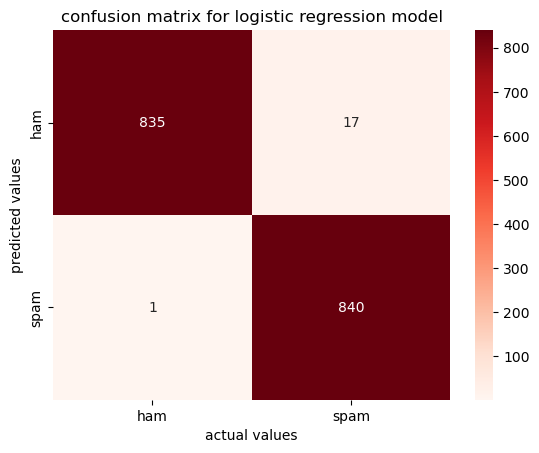

In [20]:
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)  

y_pred_logreg = logreg.predict(X_test)  

print("\naccuracy of logistic regression model:", accuracy_score(y_test, y_pred_logreg)*100)
cm = confusion_matrix(y_test, y_pred_logreg)

axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Reds", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
p = plt.xlabel('actual values')
p = plt.ylabel('predicted values')
p = plt.title('confusion matrix for logistic regression model')


accuracy of multinomial naive bayes model: 97.99173065564088


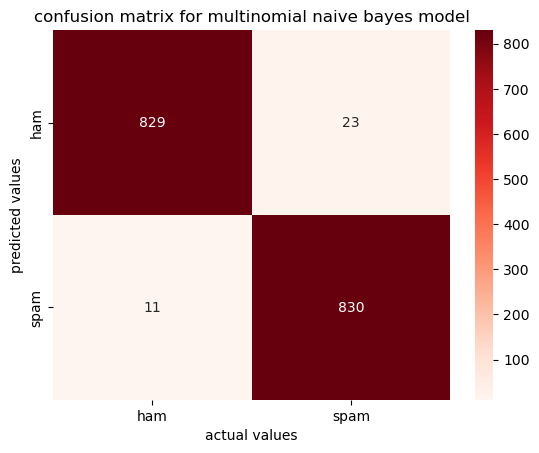

In [21]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

print("\naccuracy of multinomial naive bayes model:", accuracy_score(y_test, y_pred_mnb)*100)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm_mnb, annot=True, cmap="Reds", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g' )
p = plt.xlabel('actual values')
p = plt.ylabel('predicted values')
p = plt.title('confusion matrix for multinomial naive bayes model')


accuracy of support vector machine: 99.64559952746603


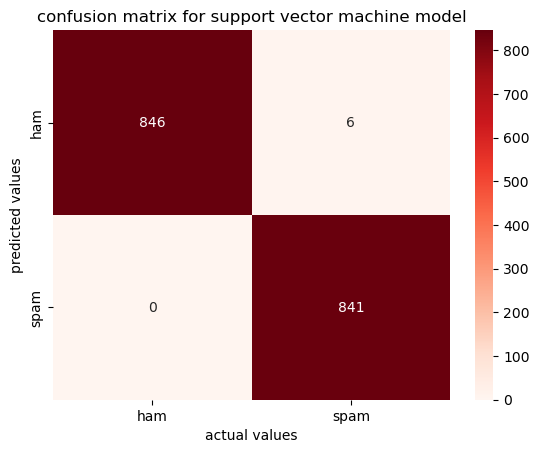

In [22]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\naccuracy of support vector machine:", accuracy_score(y_test, y_pred_svm)*100)
cm = confusion_matrix(y_test, y_pred_svm)

axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Reds", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g' )
p = plt.xlabel('actual values')
p = plt.ylabel('predicted values')
p = plt.title('confusion matrix for support vector machine model')

accuracy of random forest: 99.58653278204372


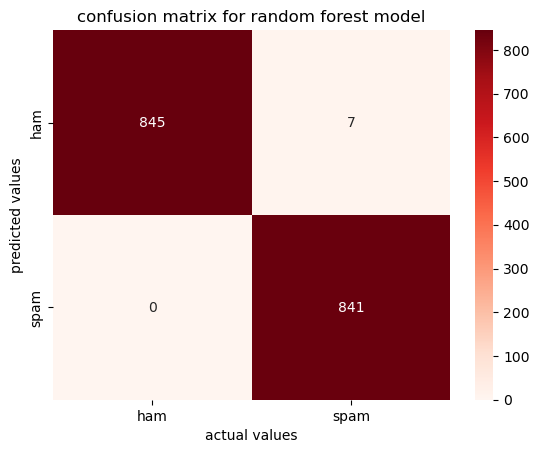

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("accuracy of random forest:", accuracy_score(y_test, y_pred_rf)*100)
cm = confusion_matrix(y_test, y_pred_rf)

axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Reds", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
p = plt.xlabel('actual values')
p = plt.ylabel('predicted values')
p = plt.title('confusion matrix for random forest model')

In [24]:
classifiers_dict = {
    'Ada \t': AdaBoostClassifier(),
    # 'ANN \t': ANN(), 
    'Bagg \t': BaggingClassifier(),
    'DT \t': DecisionTreeClassifier(),
    'KNN \t': KNeighborsClassifier(),
    'LinReg \t': LinearRegression(),
    'LogReg \t': LogisticRegression(),
    'MNB \t': MultinomialNB(),
    'SVM \t': SVC(),
    'RF \t': RandomForestClassifier()
}

# Evaluate and print results
print("Algorithm\tAccuracy Precision Recall F1 Score")
print("*" * 70)
for name, classifier in classifiers_dict.items():
    classifier.fit(X_train, y_train)
    
    if isinstance(classifier, LinearRegression):
        y_pred_continuous = classifier.predict(X_test)
        y_pred = (y_pred_continuous > 0.5).astype(int)  # Convert to 0 (ham) or 1 (spam) based on threshold
    else:
        y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{name}\t{accuracy:.4f}\t{precision:.4f}\t{recall:.4f}\t{f1:.4f}")


Algorithm	Accuracy Precision Recall F1 Score
**********************************************************************
Ada 		0.9776	0.9599	0.9964	0.9778
Bagg 		0.9852	0.9733	0.9976	0.9853
DT 		0.9864	0.9734	1.0000	0.9865
KNN 		0.9705	0.9615	0.9798	0.9706
LinReg 		0.9894	0.9813	0.9976	0.9894
LogReg 		0.9894	0.9802	0.9988	0.9894
MNB 		0.9799	0.9730	0.9869	0.9799
SVM 		0.9965	0.9929	1.0000	0.9964
RF 		0.9959	0.9917	1.0000	0.9959


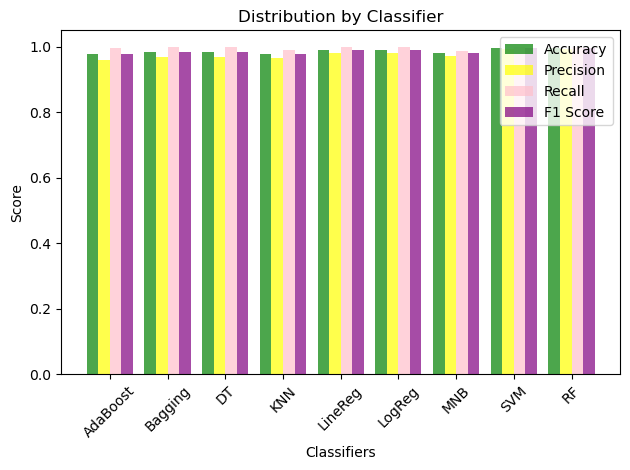

In [25]:
classifiers = ['AdaBoost','Bagging','DT','KNN','LineReg','LogReg','MNB','SVM', 'RF']

accuracies = [accuracy_score(y_test, y_pred_ada),
              #accuracy_score(y_test, y_pred_ann),
              accuracy_score(y_test, y_pred_bagging),
              accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_knn),
              accuracy_score(y_test, y_pred_linreg),
              accuracy_score(y_test, y_pred_logreg),
              accuracy_score(y_test, y_pred_mnb),
              accuracy_score(y_test, y_pred_svm),
              accuracy_score(y_test, y_pred_rf)]

precisions = [precision_score(y_test, y_pred_ada),
              #precision_score(y_test, y_pred_ann),
              precision_score(y_test, y_pred_bagging),
              precision_score(y_test, y_pred_dt),
              precision_score(y_test, y_pred_knn),
              precision_score(y_test, y_pred_linreg),
              precision_score(y_test, y_pred_logreg),
              precision_score(y_test, y_pred_mnb),
              precision_score(y_test, y_pred_svm),
              precision_score(y_test, y_pred_rf)]

recalls = [recall_score(y_test, y_pred_ada),
           #recall_score(y_test, y_pred_ann),
           recall_score(y_test, y_pred_bagging),
           recall_score(y_test, y_pred_dt),
           recall_score(y_test, y_pred_knn),
           recall_score(y_test, y_pred_linreg),
           recall_score(y_test, y_pred_logreg),
           recall_score(y_test, y_pred_mnb),
           recall_score(y_test, y_pred_svm),
           recall_score(y_test, y_pred_rf)]

f1_scores = [f1_score(y_test, y_pred_ada),
             #f1_score(y_test, y_pred_ann),
             f1_score(y_test, y_pred_bagging),
             f1_score(y_test, y_pred_dt),
             f1_score(y_test, y_pred_knn),
             f1_score(y_test, y_pred_linreg),
             f1_score(y_test, y_pred_logreg),
             f1_score(y_test, y_pred_mnb),
             f1_score(y_test, y_pred_svm),
             f1_score(y_test, y_pred_rf)]

# Bar chart
bar_width = 0.2
index = range(len(classifiers))

plt.bar(index, accuracies, color='green', label='Accuracy', width=bar_width, alpha=0.7)
plt.bar([i + bar_width for i in index], precisions, color='yellow', label='Precision', width=bar_width, alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], recalls, color='pink', label='Recall', width=bar_width, alpha=0.7)
plt.bar([i + 3 * bar_width for i in index], f1_scores, color='purple', label='F1 Score', width=bar_width, alpha=0.7)

plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('Distribution by Classifier')
plt.xticks([i + 1.5 * bar_width for i in index], classifiers, rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


In [26]:
sample_email = input("Enter an email instance: ")
sample_email = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_email)
sample_email = sample_email.lower()
sample_email_words = sample_email.split()
sample_email_words = [word for word in sample_email_words if not word in set(stopwords.words('english'))]
final_email = [wnl.lemmatize(word) for word in sample_email_words]
final_email = ' '.join(final_email)

X_final_email = tfidf.transform([final_email]).toarray()

model_choice = input("Choose a model (adaboost, bagging, dt, knn, linreg, logreg, mnb, svm, rf): ")

if model_choice == 'adaboost':
    y_pred_user_input = ada.predict(X_final_email)
#elif model_choice == 'ann':
 #   y_pred_user_input = ann.predict(X_final_email)
elif model_choice == 'bagging':
    y_pred_user_input = bagging.predict(X_final_email)
elif model_choice == 'dt':
    y_pred_user_input = dt.predict(X_final_email)
elif model_choice == 'knn':
    y_pred_user_input = knn.predict(X_final_email)
elif model_choice == 'linreg':
    y_pred_user_input = linreg.predict(X_final_email)
elif model_choice == 'logreg':
    y_pred_user_input = logreg.predict(X_final_email)
elif model_choice == 'mnb':
    y_pred_user_input = mnb.predict(X_final_email)
elif model_choice == 'svm':
    y_pred_user_input = svm.predict(X_final_email)
elif model_choice == 'rf':
    y_pred_user_input = rf.predict(X_final_email)
else:
    print("Invalid model choice. Please choose from adaboost, bagging, dt, knn, linreg, logreg, mnb, svm, rf.")
    y_pred_user_input = None

# real time prediction !! heck ya
if y_pred_user_input is not None:
    if y_pred_user_input[0] == 0:
        print("Prediction: Ham (non-spam)")
    else:
        print("Prediction: Spam")


Enter an email instance: Subject: Media Upload - Update   Hi Ms. Margaret Shayla,    Just wanted to let you know the media of the conference has arrived in my inbox. I'll be sending you feedback as I progress through them.    First Day Media Topics:  Plenary Session 1  Plenary Session 2  Inaugural Session  Award Ceremony    Please confirm you received this email. Additionally, if you have a moment, could you double-check all the categories? We want to ensure no session gets missed.   Thanks,  Elizabeth Social Media Management Team
Choose a model (adaboost, bagging, dt, knn, linreg, logreg, mnb, svm, rf): dt
Prediction: Ham (non-spam)
